<a href="https://colab.research.google.com/github/mchirico/zcovid/blob/mmc/python/CoLab/Zoe_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID-19**

Note:  You need to make a copy of this note book, if you want to run it yourself
by clicking on "File/Save a copy in Drive"











Data From: 
[JHU CSSE](https://github.com/CSSEGISandData/COVID-19)

[NYT](https://github.com/nytimes/covid-19-data/)



In [1]:
import requests
import pandas as pd
import numpy as np 
from datetime import datetime



import warnings
warnings.filterwarnings("ignore")

try:
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.dates as mdates
  sns.set(style="white", color_codes=True)
  from matplotlib_venn import venn2
  import pydot
  import libarchive
  import torch
except:
  print("Will try to install software")
  # Lines below .... Only need to be run once at the top of the notebook.
  !pip install -q matplotlib-venn
  # #   https://pypi.python.org/pypi/pydot
  !apt-get -qq install -y graphviz && pip install -q pydot
  !apt-get -qq install -y libarchive-dev && pip install -q -U libarchive
  !pip install -U -q PyDrive
  !pip install --upgrade -q gspread
  
  !pip install torchvision
  
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.dates as mdates
  sns.set(style="white", color_codes=True)
  from matplotlib_venn import venn2
  import pydot
  import libarchive





Will try to install software
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 144786 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.6_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.6) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.6) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 163kB 7.1MB/s 


In [2]:
TMP = '/tmp/data'

from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
zipurl = 'https://ihmecovid19storage.blob.core.windows.net/latest/ihme-covid19.zip'
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall(TMP)

In [3]:
file = !find  /tmp/data -iname '*.csv'
#sdate = file[0][len(TMP)+1: len(TMP)+11]
#startDate = datetime.strptime(sdate,'%Y_%m_%d')
#startDate
file

['/tmp/data/2020_11_12/best_masks_hospitalization_all_locs.csv',
 '/tmp/data/2020_11_12/reference_hospitalization_all_locs.csv',
 '/tmp/data/2020_11_12/worse_hospitalization_all_locs.csv',
 '/tmp/data/2020_11_12/Summary_stats_all_locs.csv']

In [4]:
file

['/tmp/data/2020_11_12/best_masks_hospitalization_all_locs.csv',
 '/tmp/data/2020_11_12/reference_hospitalization_all_locs.csv',
 '/tmp/data/2020_11_12/worse_hospitalization_all_locs.csv',
 '/tmp/data/2020_11_12/Summary_stats_all_locs.csv']

In [5]:
for f in file:
  if 'Worse_hospitalization_all_locs.csv' in f:
    file_hospital = f
  if 'Summary' in f:
    file_summary = f


In [6]:
url='https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv'
nyt=pd.read_csv(url)


In [7]:
nyt.head()

date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1       0
1  2020-01-22  Snohomish  Washington  53061.0      1       0
2  2020-01-23  Snohomish  Washington  53061.0      1       0
3  2020-01-24       Cook    Illinois  17031.0      1       0
4  2020-01-24  Snohomish  Washington  53061.0      1       0

# Reading Johns Hopkins

#### Read in Confirmed Cases

In [8]:
# 
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
d=pd.read_csv(url)
d.head()

UID iso2 iso3  code3  ...  11/9/20 11/10/20 11/11/20 11/12/20
0  84001001   US  USA    840  ...     2304     2328     2351     2385
1  84001003   US  USA    840  ...     7263     7348     7409     7454
2  84001005   US  USA    840  ...     1098     1107     1112     1113
3  84001007   US  USA    840  ...      932      948      961      966
4  84001009   US  USA    840  ...     2335     2378     2400     2429

[5 rows x 307 columns]

In [9]:
PERIODS = 7

c=d
cols = d.columns[10:11].tolist() + d.columns[11::].tolist()
cols
c=c[cols]
c=c.set_index('Combined_Key')
x=c.diff(axis=1,periods=PERIODS)
x=x.reset_index()
c=c.diff(axis=1)

c=c.reset_index()
c

Combined_Key  1/22/20  1/23/20  ...  11/10/20  11/11/20  11/12/20
0        Autauga, Alabama, US      NaN      0.0  ...      24.0      23.0      34.0
1        Baldwin, Alabama, US      NaN      0.0  ...      85.0      61.0      45.0
2        Barbour, Alabama, US      NaN      0.0  ...       9.0       5.0       1.0
3           Bibb, Alabama, US      NaN      0.0  ...      16.0      13.0       5.0
4         Blount, Alabama, US      NaN      0.0  ...      43.0      22.0      29.0
...                       ...      ...      ...  ...       ...       ...       ...
3335       Teton, Wyoming, US      NaN      0.0  ...      15.0       3.0      41.0
3336       Uinta, Wyoming, US      NaN      0.0  ...      46.0      13.0      37.0
3337  Unassigned, Wyoming, US      NaN      0.0  ...       0.0       0.0       0.0
3338    Washakie, Wyoming, US      NaN      0.0  ...       7.0       2.0       4.0
3339      Weston, Wyoming, US      NaN      0.0  ...      11.0       2.0      -2.0

[3340 rows x 297 columns]

In [10]:
x.head()

Combined_Key  1/22/20  1/23/20  ...  11/10/20  11/11/20  11/12/20
0  Autauga, Alabama, US      NaN      NaN  ...     131.0     139.0     155.0
1  Baldwin, Alabama, US      NaN      NaN  ...     353.0     348.0     357.0
2  Barbour, Alabama, US      NaN      NaN  ...      33.0      33.0      33.0
3     Bibb, Alabama, US      NaN      NaN  ...      58.0      64.0      59.0
4   Blount, Alabama, US      NaN      NaN  ...     216.0     212.0     207.0

[5 rows x 297 columns]

In [11]:
n=pd.melt(x, id_vars=['Combined_Key'], value_vars=x.columns[2::])
n.columns = ['Country/Region', 'timeStamp',  'value']
n['timeStamp'] = n['timeStamp'].apply(lambda x: datetime.strptime(x,'%m/%d/%y'))
n.head()

Country/Region  timeStamp  value
0  Autauga, Alabama, US 2020-01-23    NaN
1  Baldwin, Alabama, US 2020-01-23    NaN
2  Barbour, Alabama, US 2020-01-23    NaN
3     Bibb, Alabama, US 2020-01-23    NaN
4   Blount, Alabama, US 2020-01-23    NaN

## N is smoother

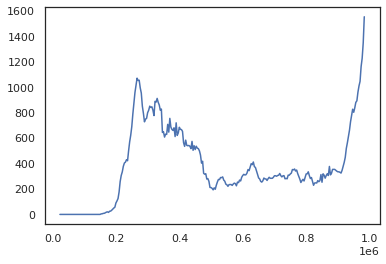

In [12]:

regions = ['Montgomery, Pennsylvania, US']
for region in regions:
  z= n[n['Country/Region'].str.find(region,0)==0]
  z['value'].plot.line(x='timeStamp',y='value');

In [13]:
m=pd.melt(c, id_vars=['Combined_Key'], value_vars=c.columns[2::])
m.columns = ['Country/Region', 'timeStamp',  'value']
m['timeStamp'] = m['timeStamp'].apply(lambda x: datetime.strptime(x,'%m/%d/%y'))
m.head()

Country/Region  timeStamp  value
0  Autauga, Alabama, US 2020-01-23    0.0
1  Baldwin, Alabama, US 2020-01-23    0.0
2  Barbour, Alabama, US 2020-01-23    0.0
3     Bibb, Alabama, US 2020-01-23    0.0
4   Blount, Alabama, US 2020-01-23    0.0

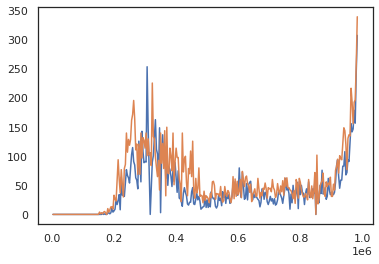

In [14]:
regions = ['Bucks, Pennsylvania, US','Montgomery, Pennsylvania, US']
for region in regions:
  z= m[m['Country/Region'].str.find(region,0)==0]
  z['value'].plot.line();

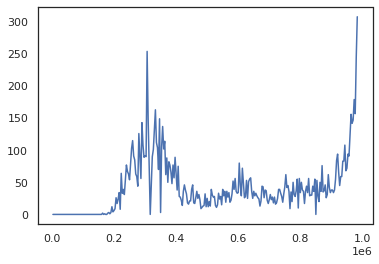

In [15]:
regions = ['Bucks, Pennsylvania, US']
for region in regions:
  m[m['Country/Region'].str.find(region,0)==0]['value'].plot.line();

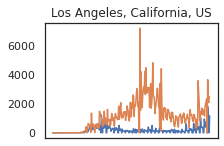

In [16]:
regions = ['Philadelphia, Pennsylvania, US']
regions = ['Potter, Texas, US']
regions = ['Dallas, Texas, US']
#regions = ['New York City, New York, US']
regions = ['Los Angeles, California, US']
regions = ['Philadelphia, Pennsylvania, US','Los Angeles, California, US']
fig=plt.figure()
for region in regions:
  m[m['Country/Region'].str.find(region,0)==0]['value'].plot.line(title=region,xticks=[],ax=fig.add_axes((0.05,0.5,0.4,0.4)));
plt.show()

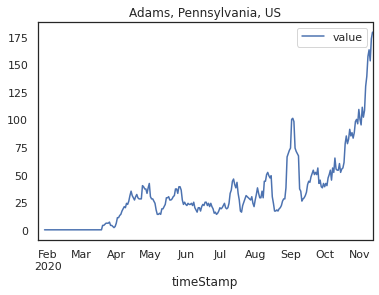

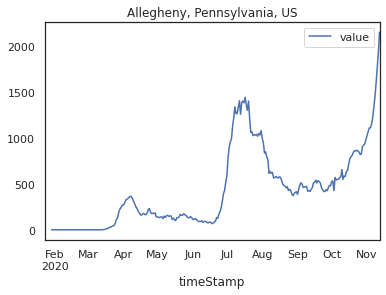

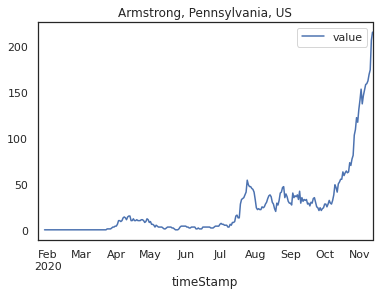

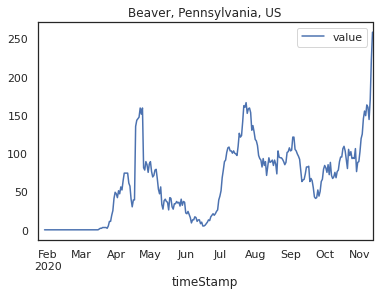

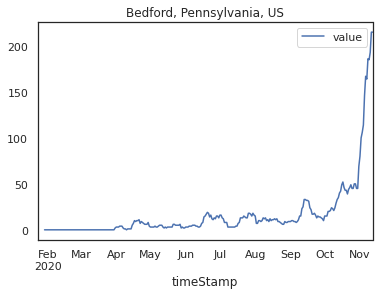

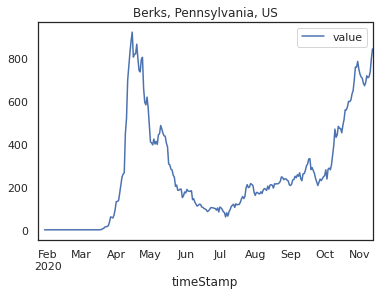

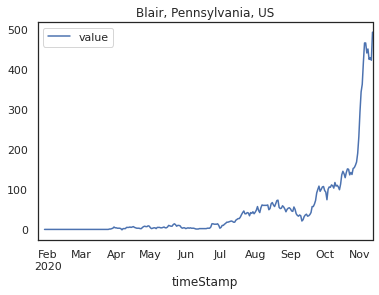

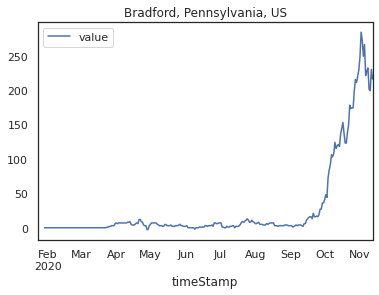

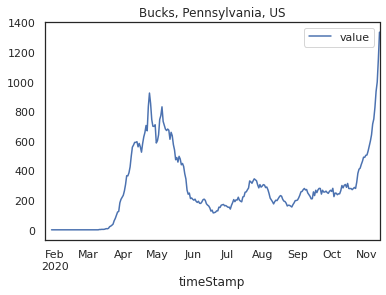

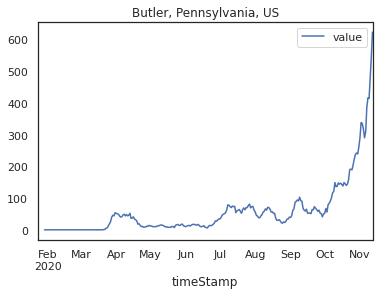

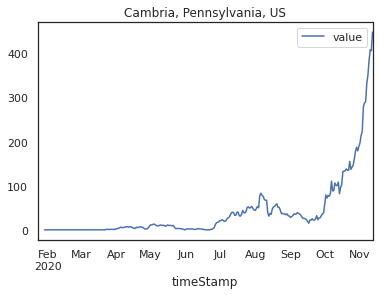

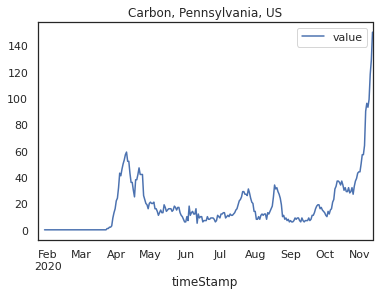

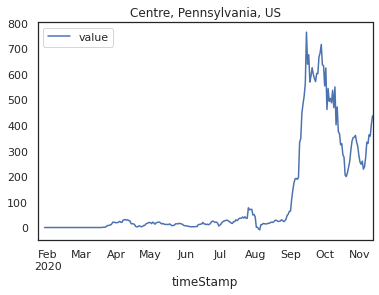

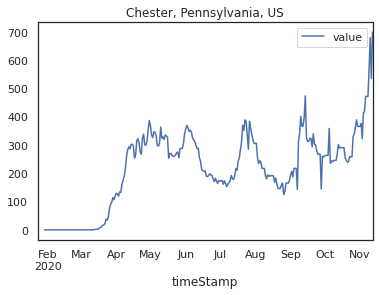

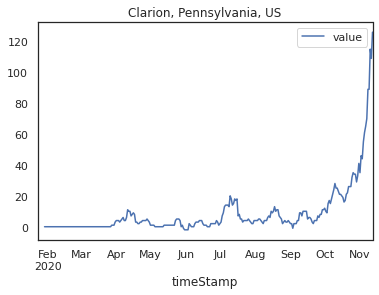

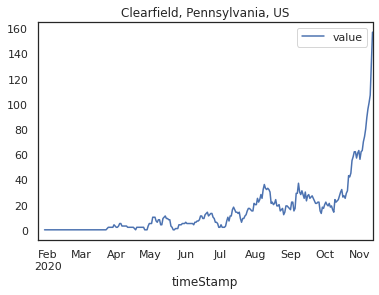

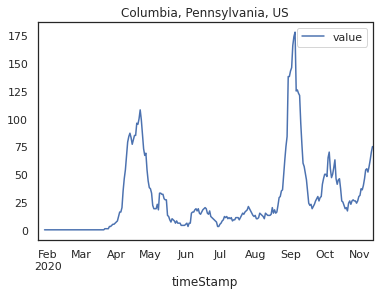

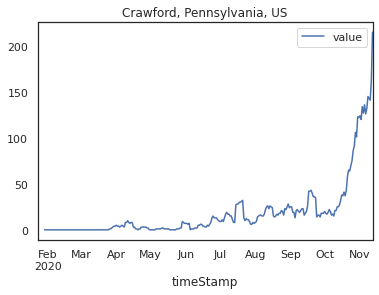

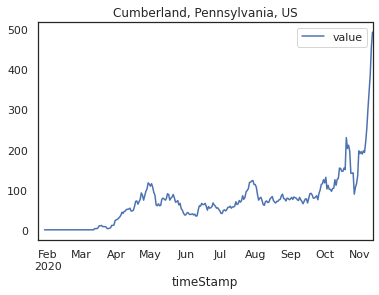

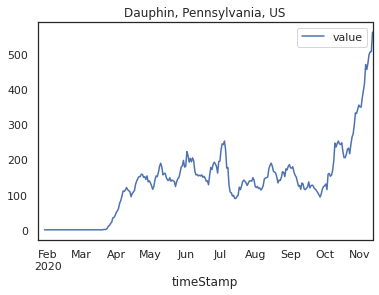

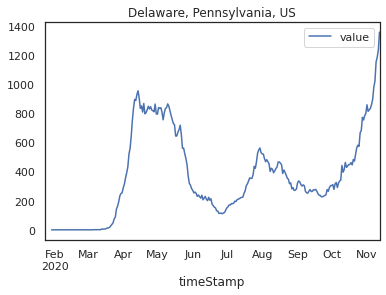

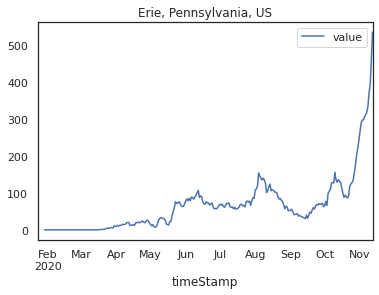

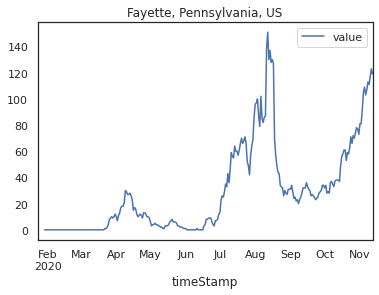

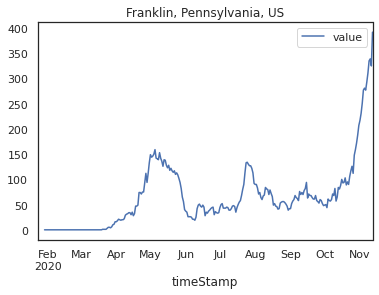

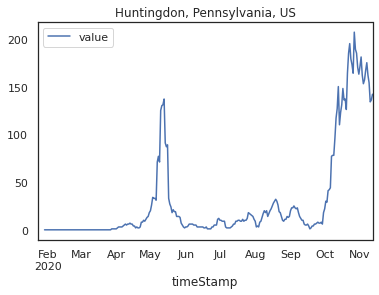

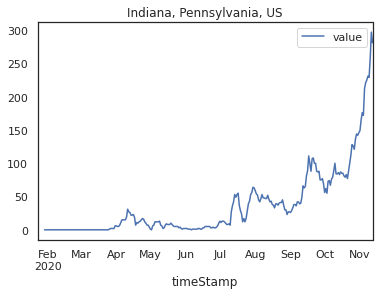

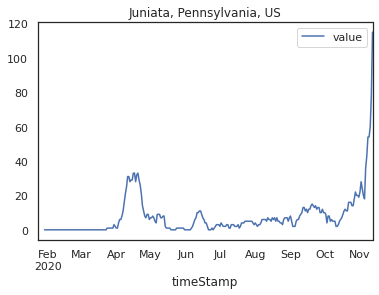

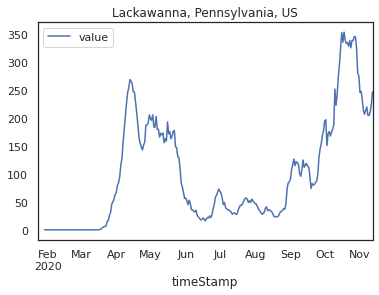

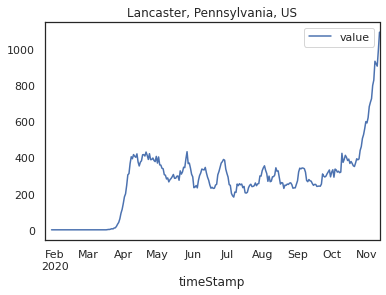

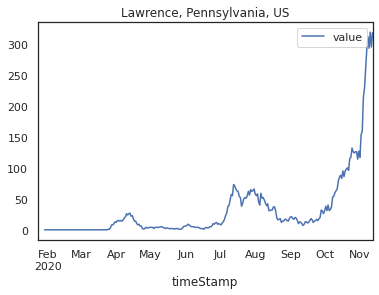

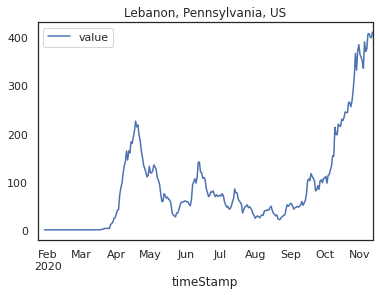

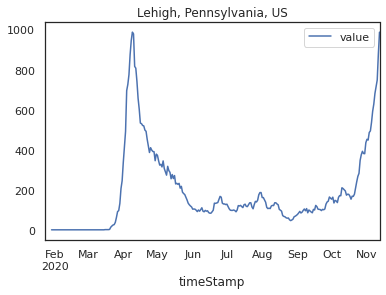

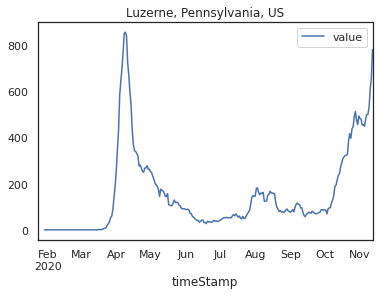

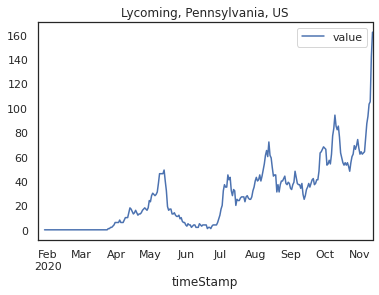

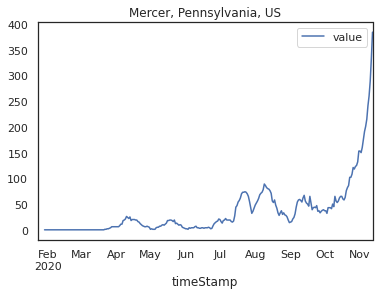

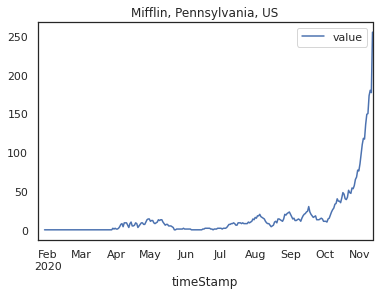

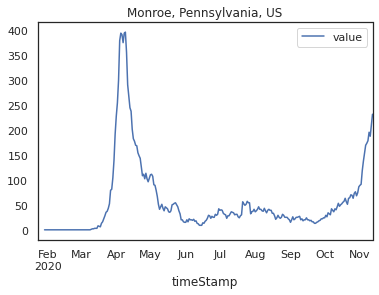

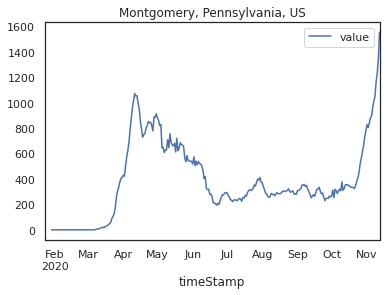

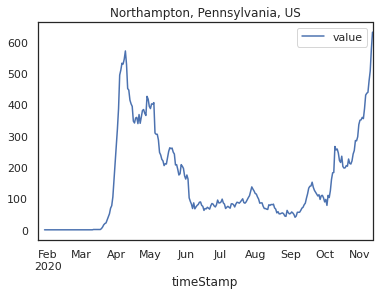

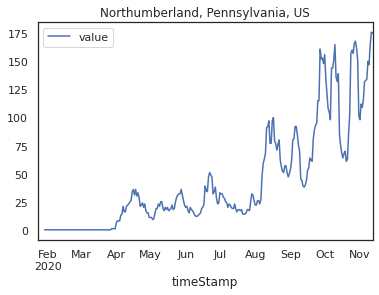

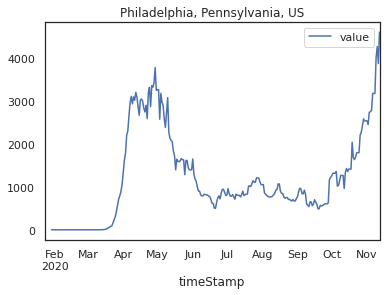

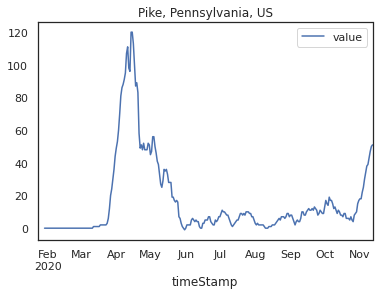

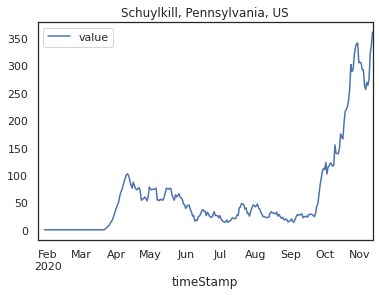

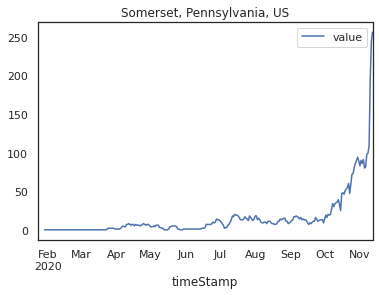

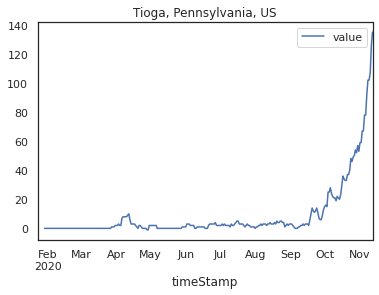

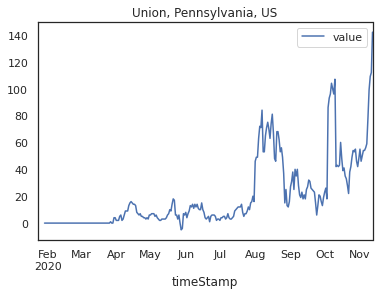

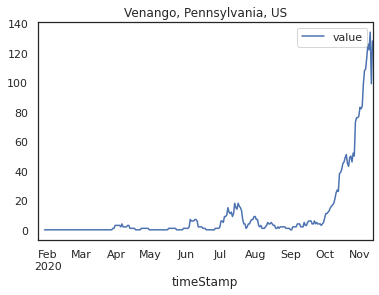

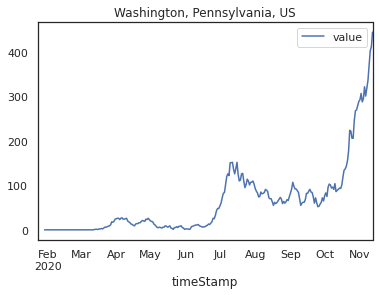

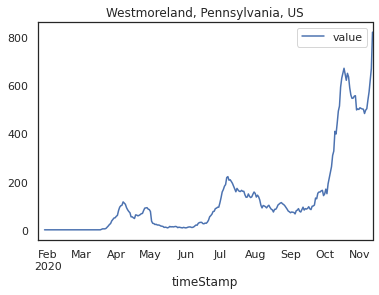

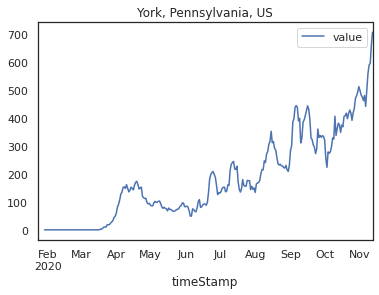

In [17]:
import matplotlib.pyplot as plt


t = n[(n['Country/Region'].str.find('Pennsylvania',0)!= -1)]
my_list = t[t['value']>100]['Country/Region'].unique()
t=t[t['Country/Region'].isin(my_list)]

for title, group in t.groupby('Country/Region'):
  try:
    group.plot(x='timeStamp', y='value', title=title)
  except:
    print('title',title)

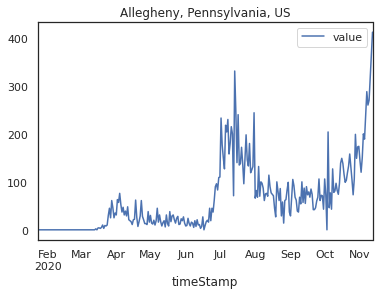

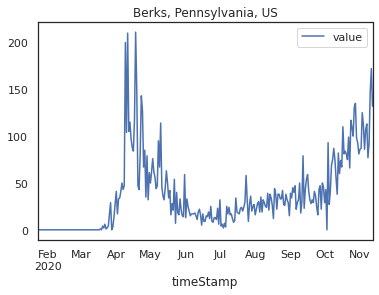

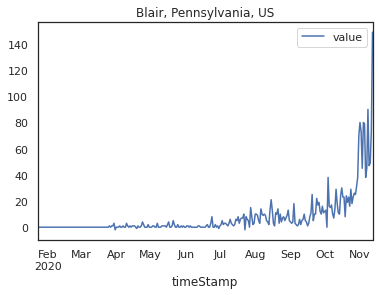

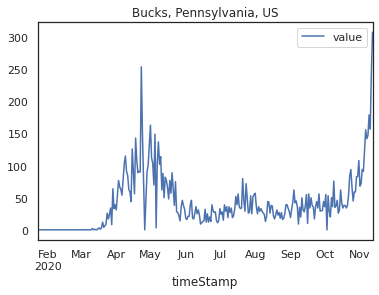

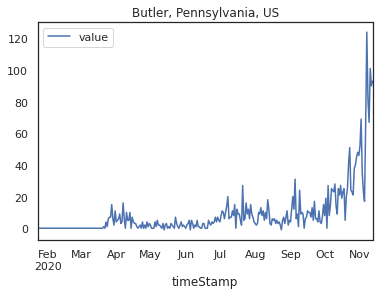

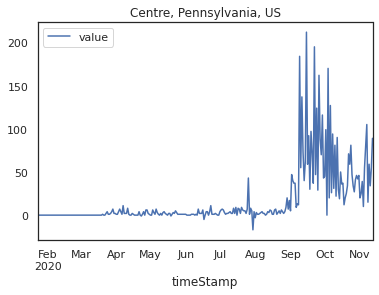

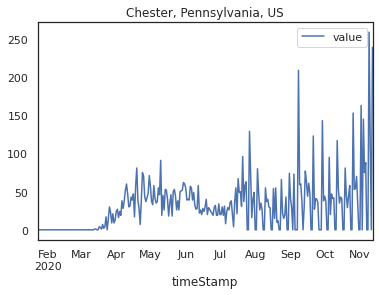

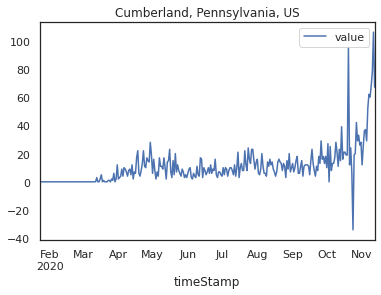

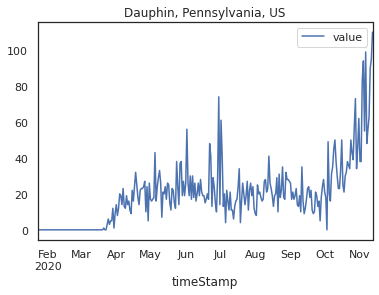

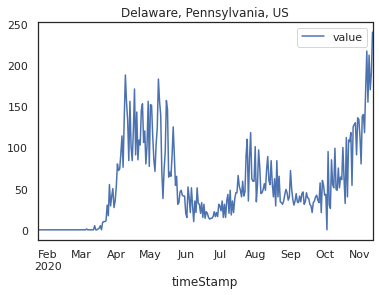

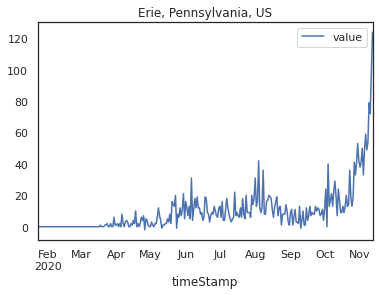

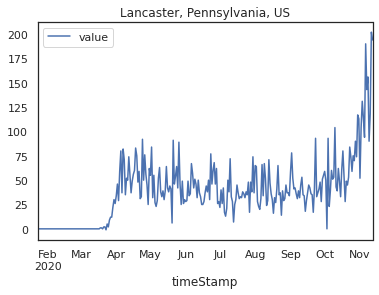

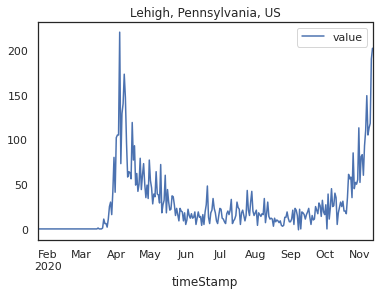

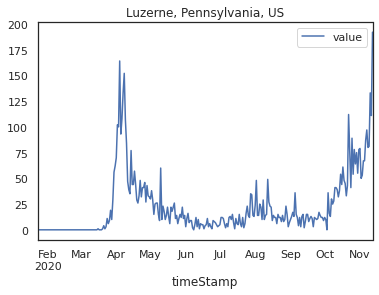

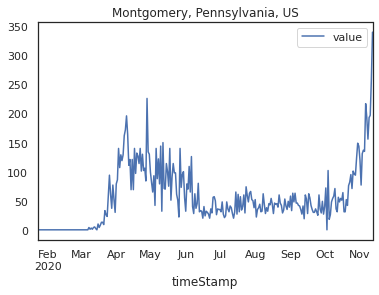

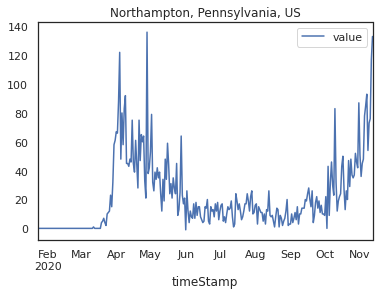

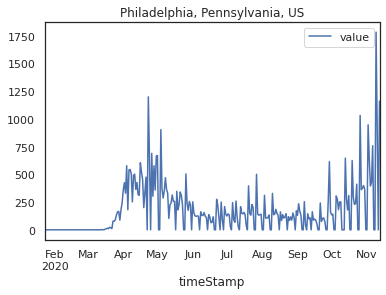

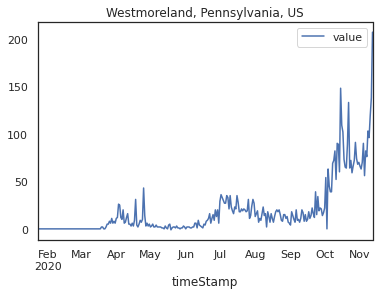

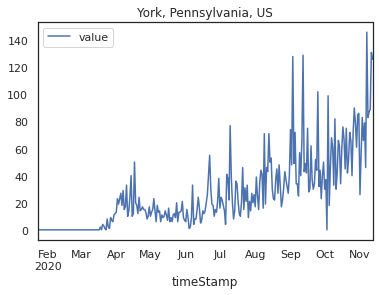

In [18]:
import matplotlib.pyplot as plt


t = m[(m['Country/Region'].str.find('Pennsylvania',0)!= -1)]
my_list = t[t['value']>100]['Country/Region'].unique()
t=t[t['Country/Region'].isin(my_list)]

for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)

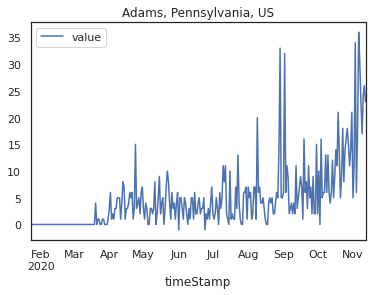

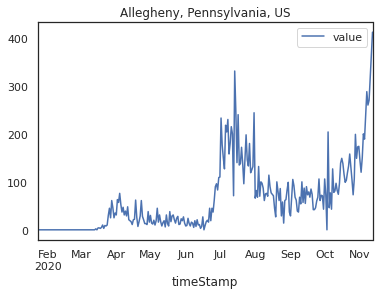

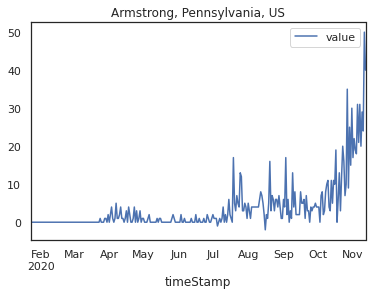

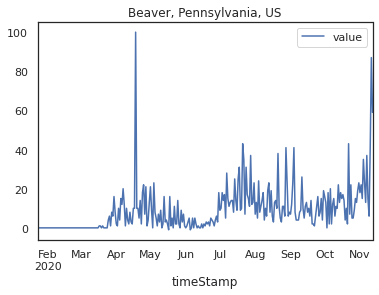

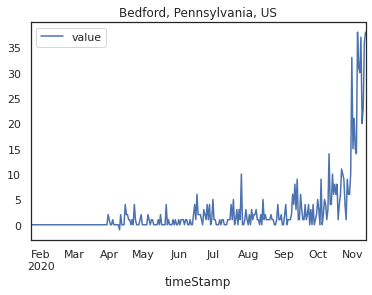

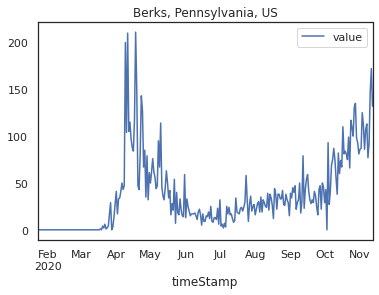

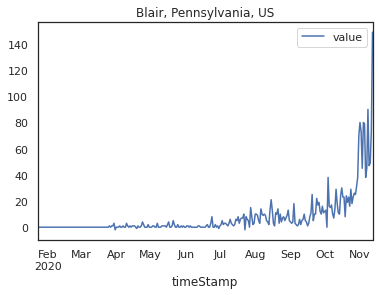

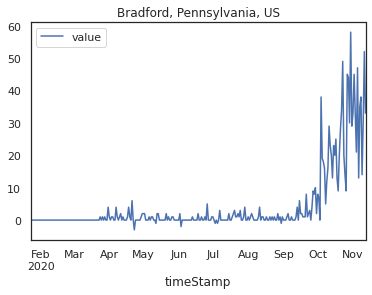

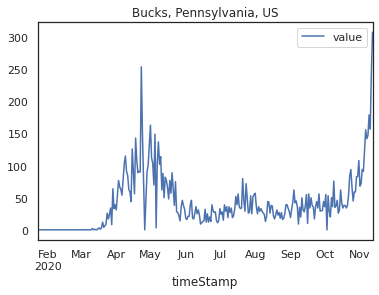

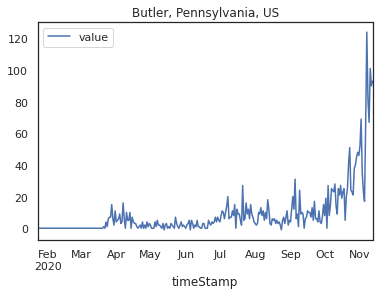

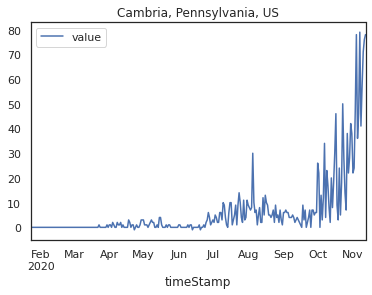

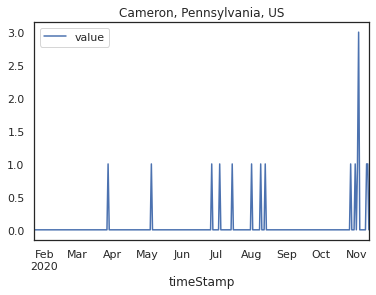

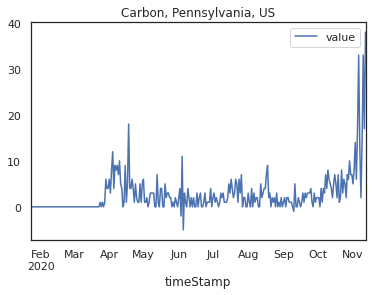

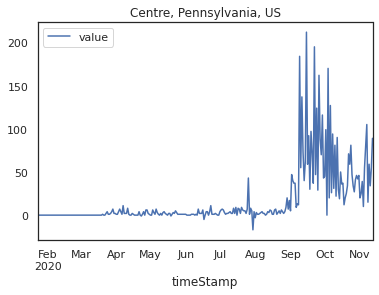

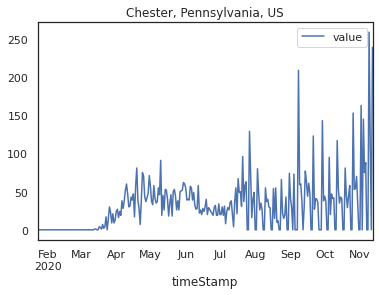

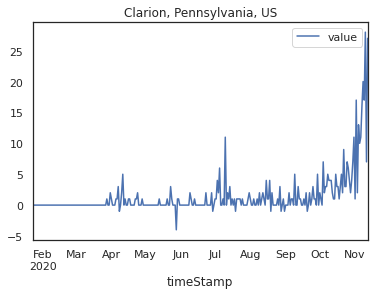

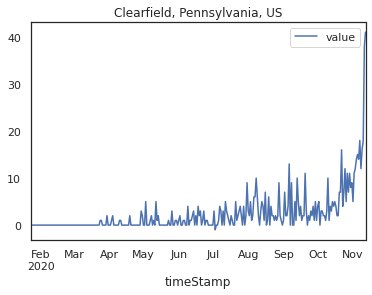

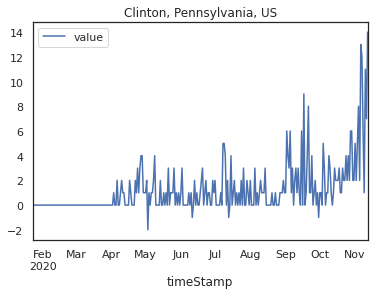

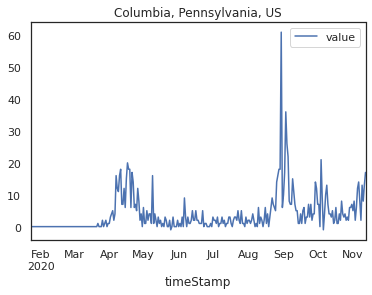

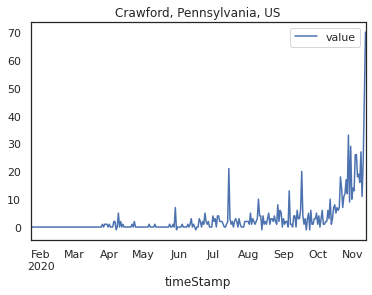

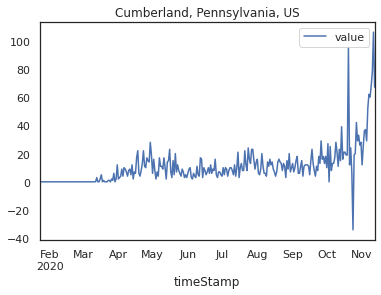

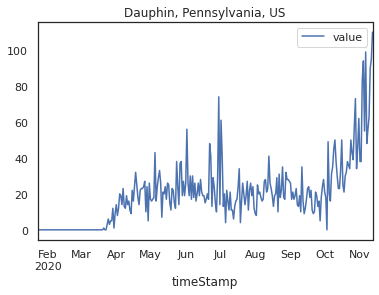

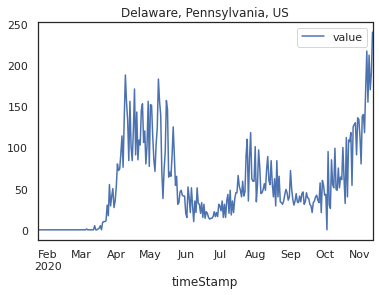

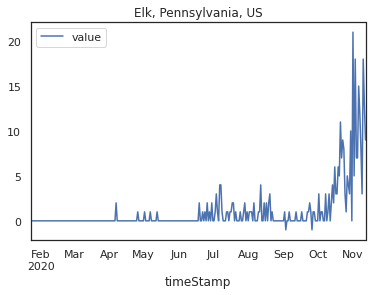

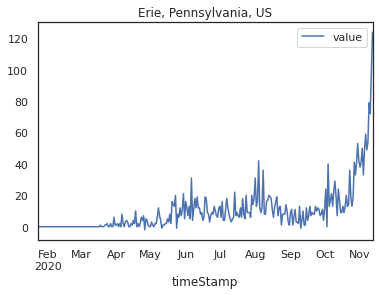

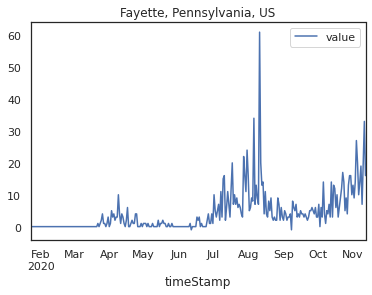

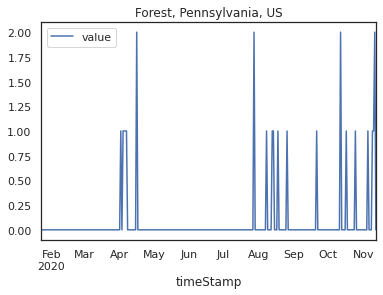

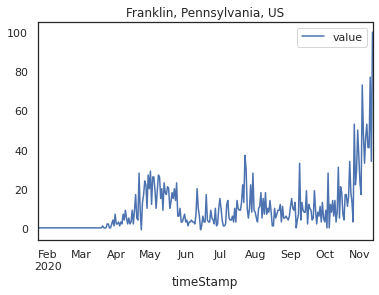

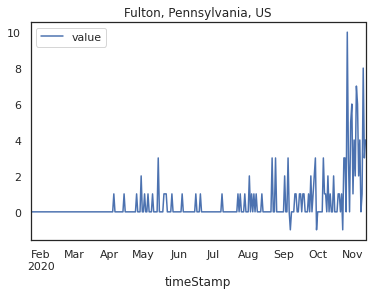

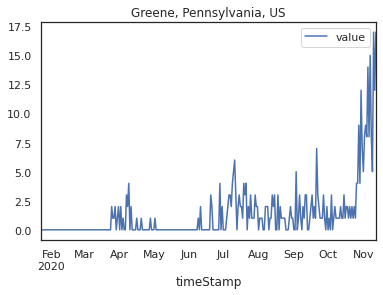

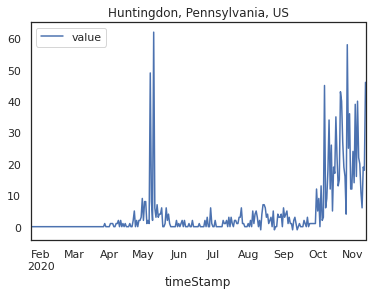

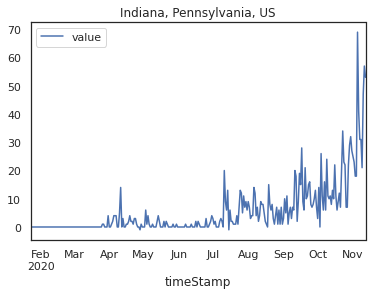

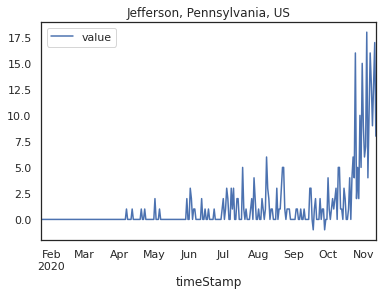

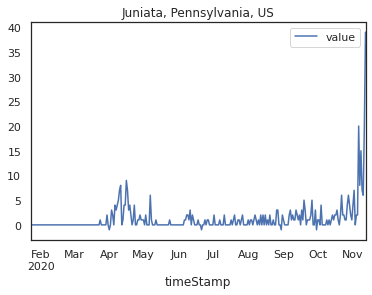

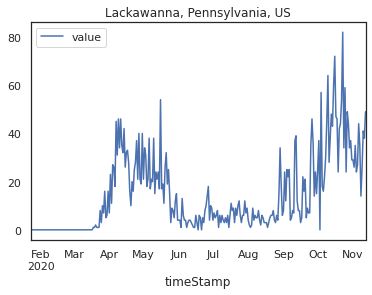

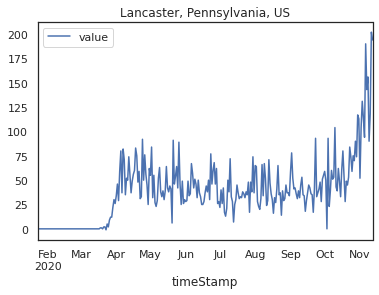

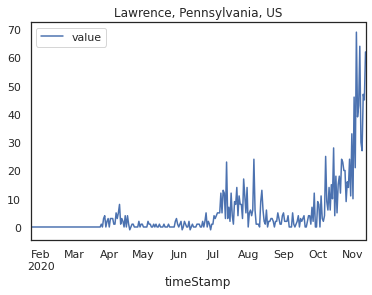

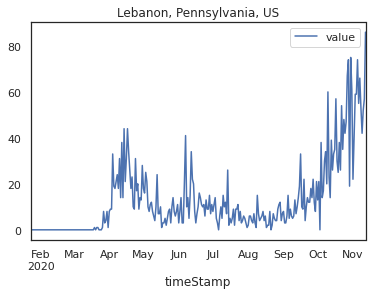

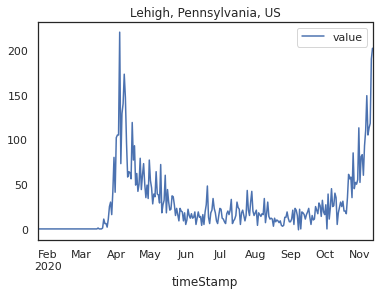

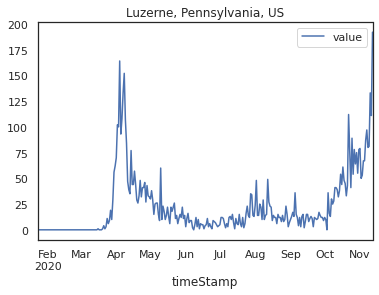

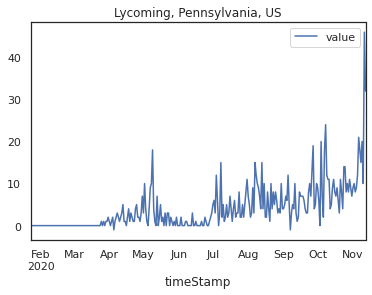

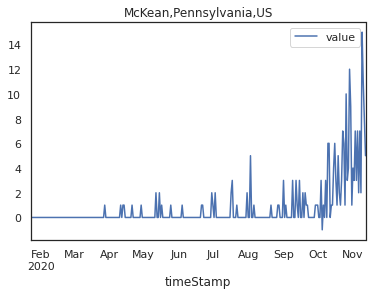

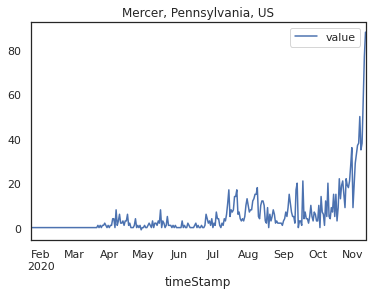

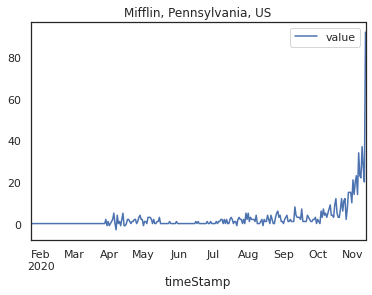

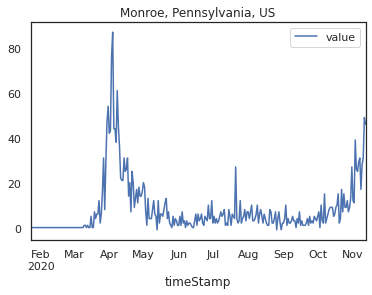

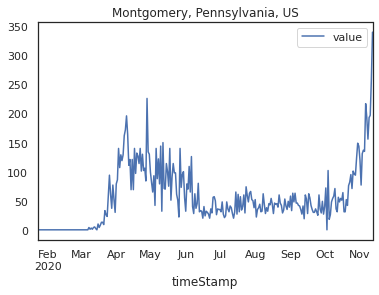

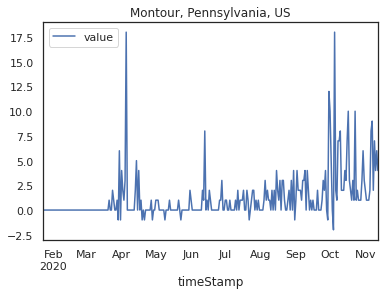

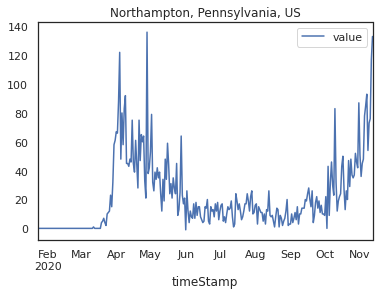

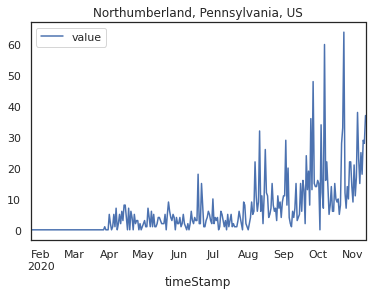

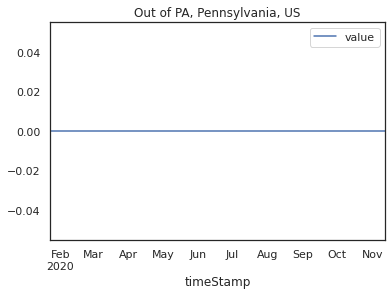

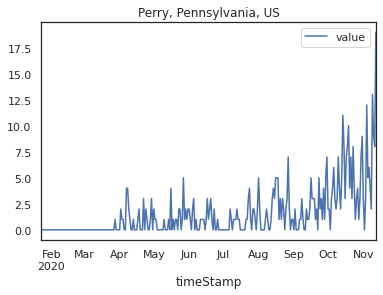

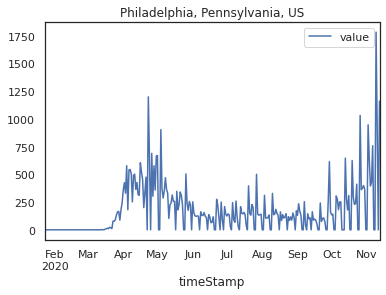

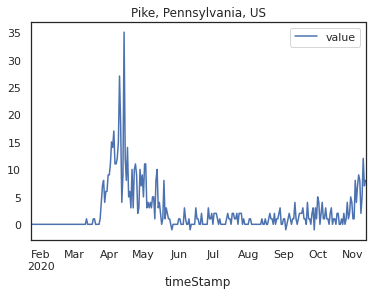

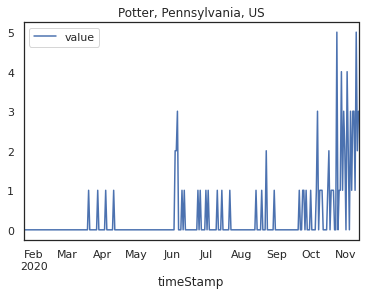

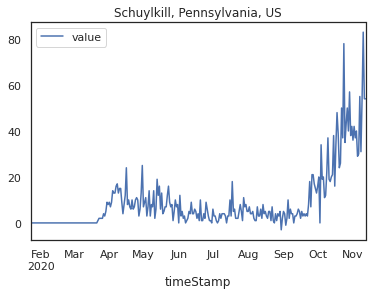

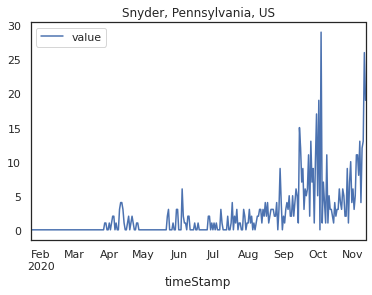

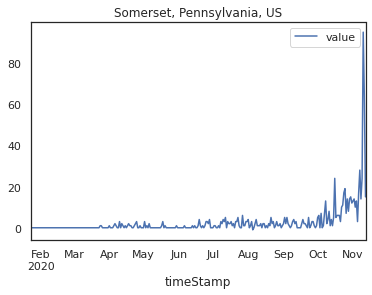

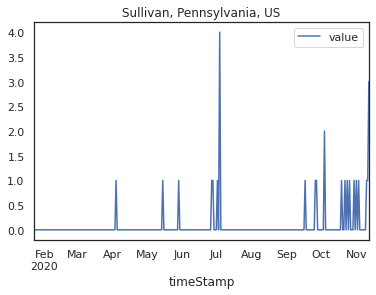

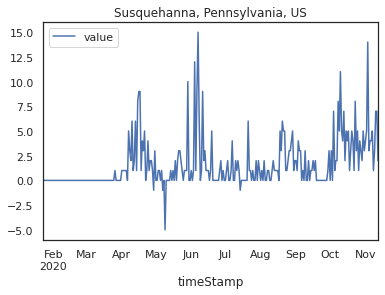

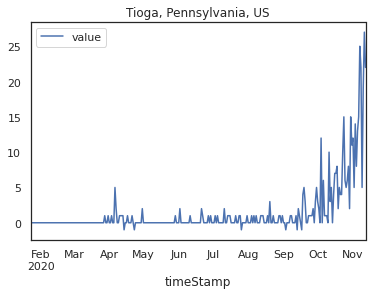

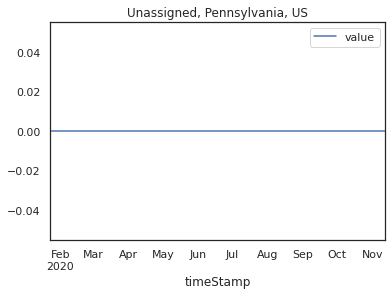

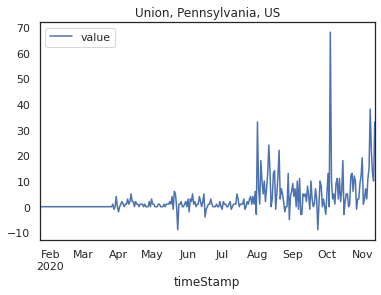

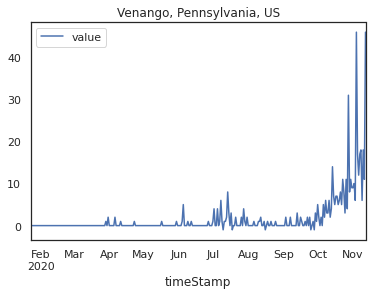

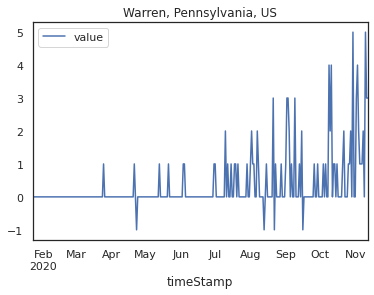

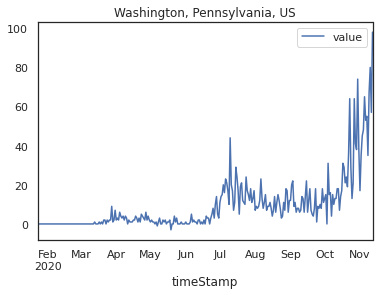

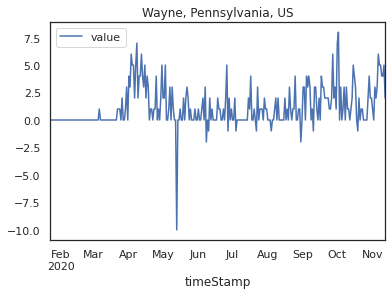

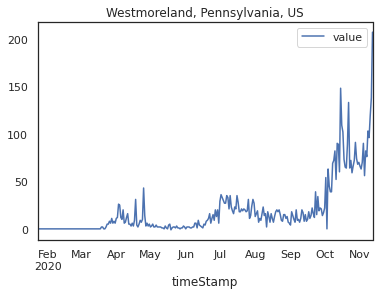

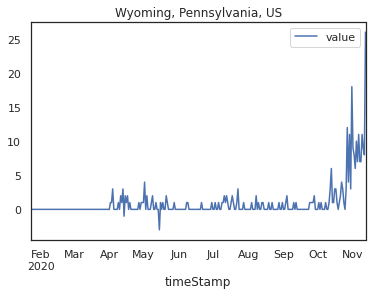

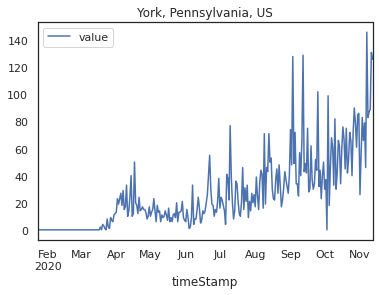

In [19]:
import matplotlib.pyplot as plt
t = m[(m['Country/Region'].str.find('Pennsylvania',0)!= -1)]
for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)

In [20]:
delta_days = 20

from datetime import date, timedelta
dt = date.today() - timedelta(delta_days)
dt.strftime("%Y-%m-%d")

'2020-10-24'

In [21]:
penn = m[m['Country/Region'].str.contains('Pennsylvania', regex=False)]
penn = m
penn = penn[penn['timeStamp'] >= dt.strftime("%Y-%m-%d") ]
penn['timeStamp'].describe()

count                   66800
unique                     20
top       2020-10-28 00:00:00
freq                     3340
first     2020-10-24 00:00:00
last      2020-11-12 00:00:00
Name: timeStamp, dtype: object

In [22]:

pp = penn.pivot(index='Country/Region', columns='timeStamp', values='value')
#sns.heatmap(pp, annot=True)

In [23]:
pp.diff(axis=1)

timeStamp                      2020-10-24  2020-10-25  ...  2020-11-11  2020-11-12
Country/Region                                         ...                        
Abbeville, South Carolina, US         NaN         2.0  ...         1.0         1.0
Acadia, Louisiana, US                 NaN        13.0  ...       -19.0        43.0
Accomack, Virginia, US                NaN         1.0  ...         1.0         2.0
Ada, Idaho, US                        NaN      -174.0  ...       284.0      -316.0
Adair, Iowa, US                       NaN         3.0  ...         7.0         0.0
...                                   ...         ...  ...         ...         ...
Yuma, Arizona, US                     NaN        26.0  ...        -9.0       -58.0
Yuma, Colorado, US                    NaN        -6.0  ...         1.0        -2.0
Zapata, Texas, US                     NaN        -2.0  ...         0.0        -1.0
Zavala, Texas, US                     NaN        -2.0  ...        -6.0         0.0
Ziebach, South Dakota, US             NaN         1.0  ...         1.0         6.0

[3340 rows x 20 columns]

In [24]:
t = pp.diff(axis=1).reset_index()
md=pd.melt(t, id_vars=['Country/Region'], value_vars=t.columns[2::])

md.head()

Country/Region  timeStamp  value
0  Abbeville, South Carolina, US 2020-10-25    2.0
1          Acadia, Louisiana, US 2020-10-25   13.0
2         Accomack, Virginia, US 2020-10-25    1.0
3                 Ada, Idaho, US 2020-10-25 -174.0
4                Adair, Iowa, US 2020-10-25    3.0

In [25]:
r = md.groupby(['Country/Region', pd.Grouper(key='timeStamp', freq='5d')]).describe()
r = r.reset_index()
r.columns = r.columns.get_level_values(0)
new_index = ['Country/Region', 'timeStamp', 'count',	'mean',	'std',	'min',	'25%',	'50%',	'75%',	'max']
r.columns = new_index

r[r['max'] > 100]

Country/Region  timeStamp  count  ...   50%     75%    max
5         Acadia, Louisiana, US 2020-10-30    5.0  ...   0.0   13.00  107.0
13               Ada, Idaho, US 2020-10-30    5.0  ...  -8.0   38.00  281.0
14               Ada, Idaho, US 2020-11-04    5.0  ... -47.0  106.00  140.0
15               Ada, Idaho, US 2020-11-09    4.0  ... -11.5  131.00  284.0
32          Adams, Colorado, US 2020-10-25    5.0  ...  10.0   32.00  101.0
...                         ...        ...    ...  ...   ...     ...    ...
13222     Wyandotte, Kansas, US 2020-11-04    5.0  ...   0.0  156.00  183.0
13223     Wyandotte, Kansas, US 2020-11-09    4.0  ... -78.0   54.00  216.0
13282      Yavapai, Arizona, US 2020-11-04    5.0  ... -12.0   10.00  134.0
13299  Yellowstone, Montana, US 2020-11-09    4.0  ...   5.0   53.25  108.0
13343         Yuma, Arizona, US 2020-11-09    4.0  ... -33.5   27.50  137.0

[779 rows x 10 columns]

In [ ]:
r[r['Country/Region']=='Montgomery, Pennsylvania, US']

Country/Region  timeStamp  count  ...   50%    75%   max
8196  Montgomery, Pennsylvania, US 2020-10-23    5.0  ...   6.0  13.00  30.0
8197  Montgomery, Pennsylvania, US 2020-10-28    5.0  ...  -2.0  26.00  29.0
8198  Montgomery, Pennsylvania, US 2020-11-02    5.0  ...   6.0  54.00  82.0
8199  Montgomery, Pennsylvania, US 2020-11-07    4.0  ... -10.0  12.25  37.0

[4 rows x 10 columns]

In [ ]:
r.head()

Country/Region  timeStamp  count  mean  ...   25%  50%   75%   max
0  Abbeville, South Carolina, US 2020-07-09    5.0   0.2  ... -2.00  1.0  2.00   6.0
1  Abbeville, South Carolina, US 2020-07-14    5.0   1.0  ...  1.00  1.0  2.00   3.0
2  Abbeville, South Carolina, US 2020-07-19    5.0  -0.6  ... -4.00 -1.0  3.00  47.0
3  Abbeville, South Carolina, US 2020-07-24    4.0  -1.0  ... -1.75 -1.0 -0.25   2.0
4          Acadia, Louisiana, US 2020-07-09    5.0   3.6  ... -6.00 -1.0  2.00  46.0

[5 rows x 10 columns]

In [26]:
t=md.groupby(['Country/Region', pd.Grouper(key='timeStamp', freq='3d')]).sum()
t=t.reset_index()
total = t.groupby(['Country/Region']).sum().reset_index()
total[total['Country/Region']=='Montgomery, Pennsylvania, US']

Country/Region  value
2049  Montgomery, Pennsylvania, US  245.0

In [27]:
pd.set_option('display.max_rows', 1000)
ts = total.sort_values('value',ascending=False)
ts[ts['value']>100].head(300)

Country/Region   value
655                                  Cook, Illinois, US  2875.0
3004                          Unassigned, Louisiana, US  1632.0
2557                          Riverside, California, US  1200.0
2364                     Philadelphia, Pennsylvania, US  1159.0
3026                       Unassigned, Rhode Island, US   988.0
2627                          San Diego, California, US   863.0
1286                            Hennepin, Minnesota, US   774.0
3061                                     Utah, Utah, US   738.0
2799                            St. Louis, Missouri, US   709.0
2621                                Salt Lake, Utah, US   708.0
1555                               King, Washington, US   708.0
3019                     Unassigned, North Carolina, US   706.0
729                                  Cuyahoga, Ohio, US   650.0
843                               Douglas, Nebraska, US   643.0
1850                                Marion, Indiana, US   632.0
1969                            Miami-Dade, Florida, US   589.0
1986                           Milwaukee, Wisconsin, US   584.0
76                                 Anoka, Minnesota, US   536.0
2417                                     Polk, Iowa, US   497.0
798                                Denver, Colorado, US   491.0
3254                                 Will, Illinois, US   468.0
2497                              Ramsey, Minnesota, US   439.0
911                                  Erie, New York, US   435.0
2892                                 Tarrant, Texas, US   416.0
1007                                 Franklin, Ohio, US   408.0
3188                                Wayne, Michigan, US   405.0
1536                                 Kent, Michigan, US   400.0
2378                             Pierce, Washington, US   399.0
8                                   Adams, Colorado, US   394.0
2238                            Ouachita, Louisiana, US   393.0
1614                                  Lake, Indiana, US   390.0
3180                            Waukesha, Wisconsin, US   389.0
1767                        Los Angeles, California, US   370.0
85                               Arapahoe, Colorado, US   368.0
2171                              Oakland, Michigan, US   368.0
208                          Bernalillo, New Mexico, US   355.0
1613                                 Lake, Illinois, US   354.0
742                                 Dane, Wisconsin, US   346.0
2123                         New Haven, Connecticut, US   345.0
2444                                  Potter, Texas, US   344.0
1797                               Macomb, Michigan, US   339.0
733                               Dakota, Minnesota, US   335.0
889                               El Paso, Colorado, US   327.0
1972                       Middlesex, Massachusetts, US   327.0
1737                                     Linn, Iowa, US   321.0
2858                                   Summit, Ohio, US   319.0
2681                                    Scott, Iowa, US   317.0
1263                          Hartford, Connecticut, US   304.0
1448                            Jefferson, Colorado, US   299.0
2819                             Stearns, Minnesota, US   288.0
443                              Cass, North Dakota, US   283.0
50                          Allegheny, Pennsylvania, US   281.0
930                          Fairfield, Connecticut, US   277.0
895                                Elkhart, Indiana, US   275.0
2048                               Montgomery, Ohio, US   268.0
2467                               Pueblo, Colorado, US   261.0
2777                            Spokane, Washington, US   261.0
203                              Bergen, New Jersey, US   258.0
2726                           Sherburne, Minnesota, US   257.0
2798                           St. Louis, Minnesota, US   257.0
3296                       Worcester, Massachusetts, US   256.0
3275                           Winnebago, Wisconsin, US   252.0
1516     

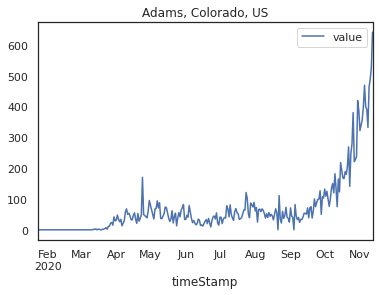

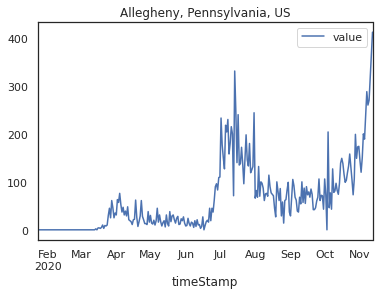

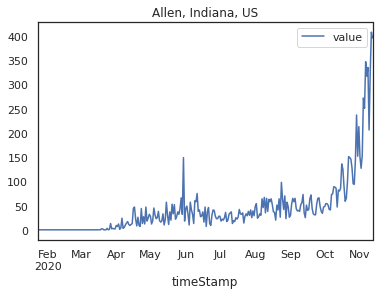

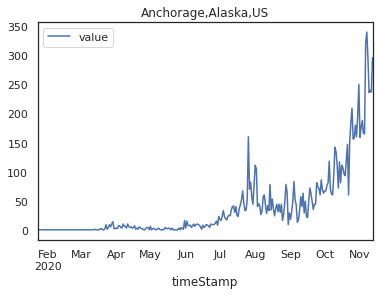

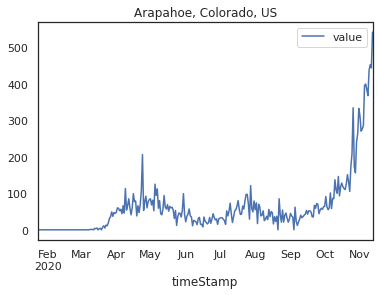

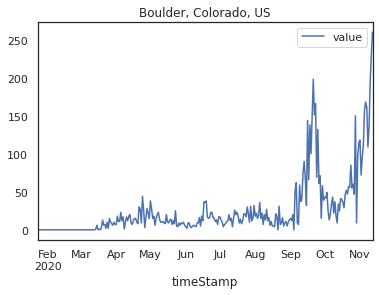

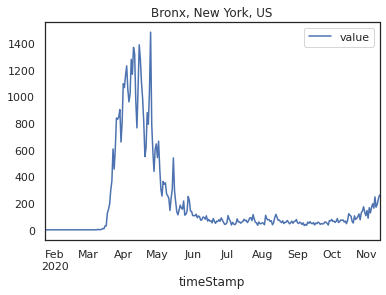

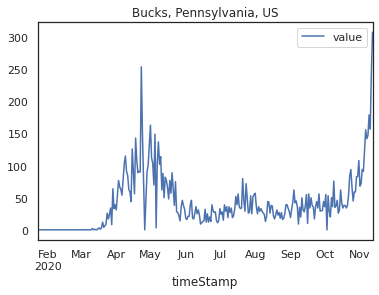

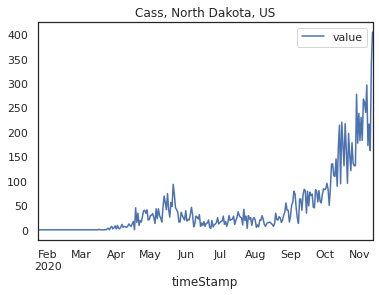

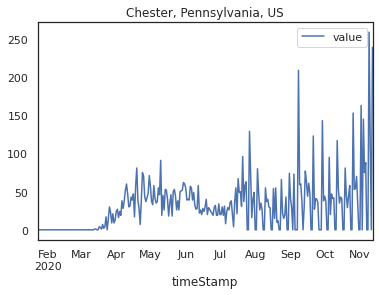

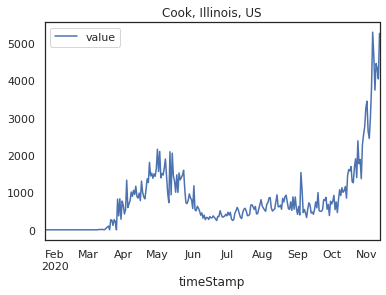

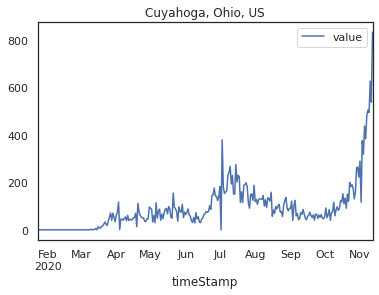

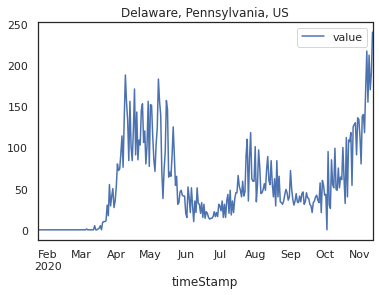

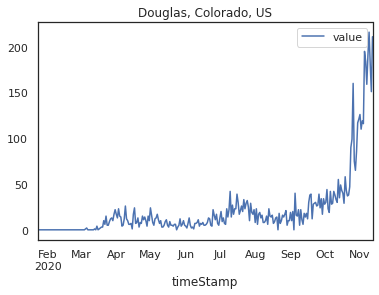

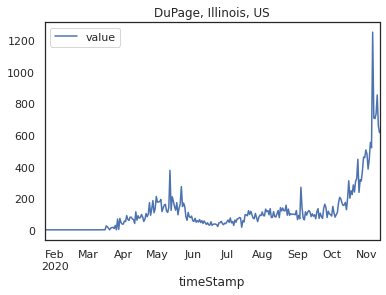

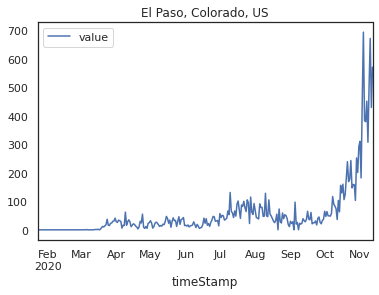

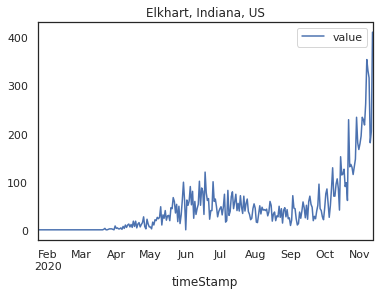

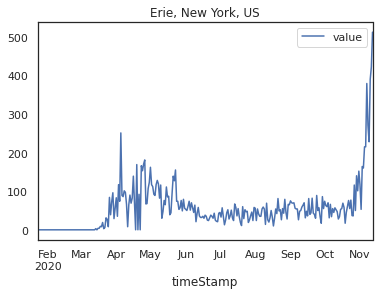

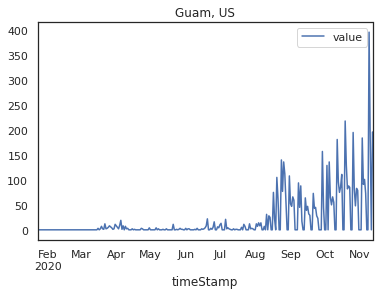

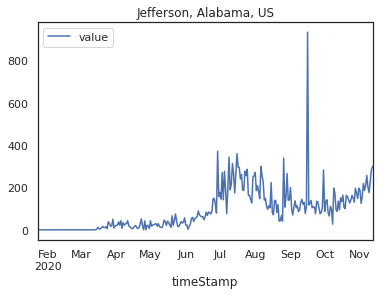

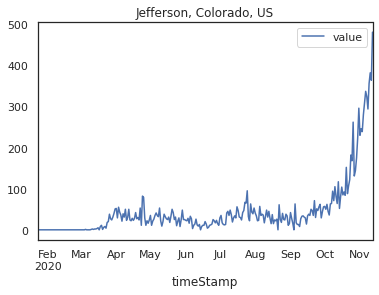

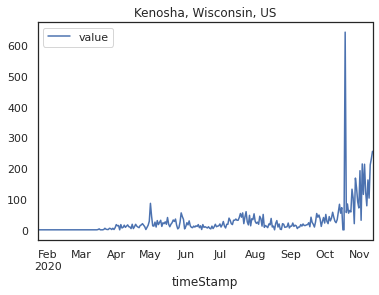

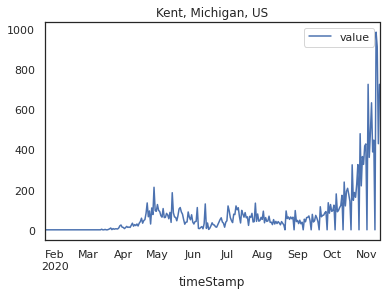

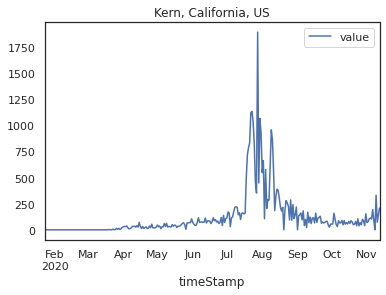

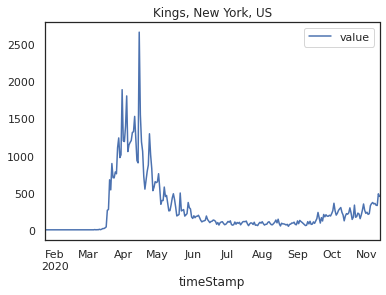

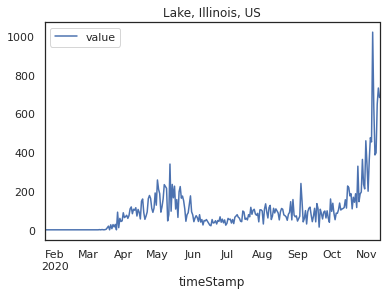

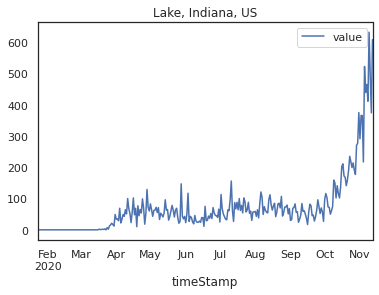

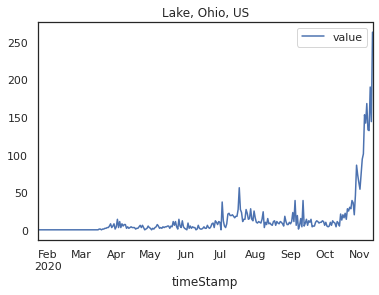

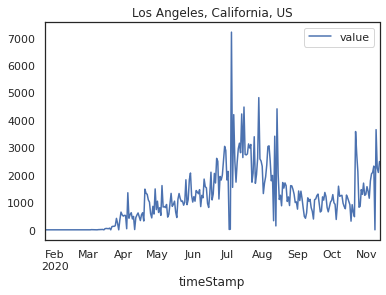

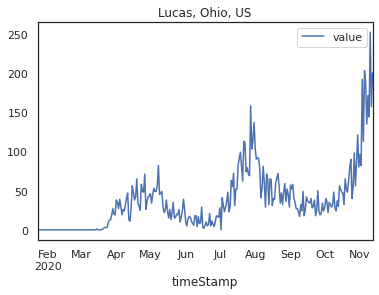

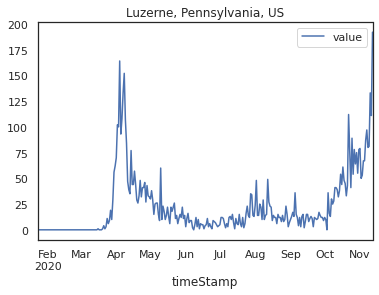

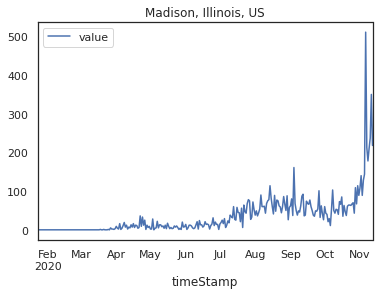

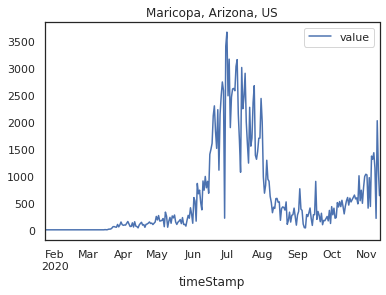

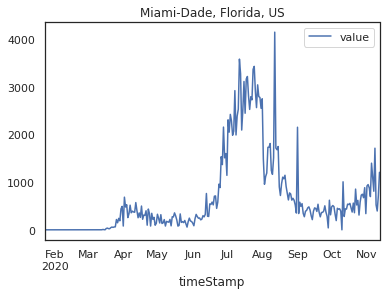

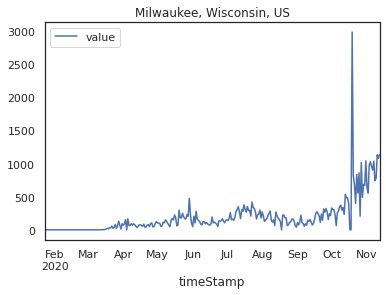

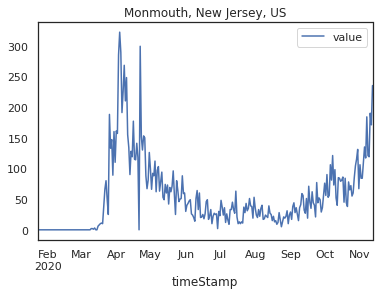

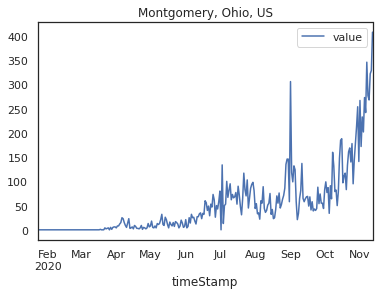

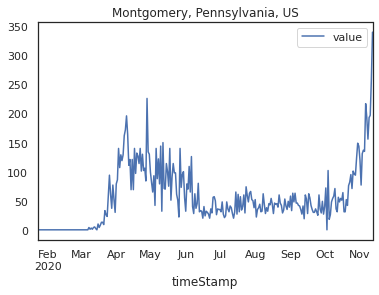

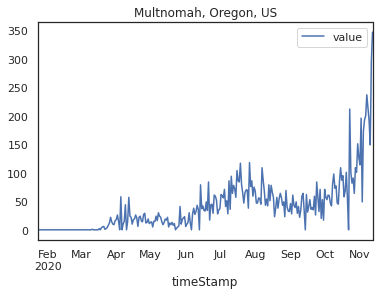

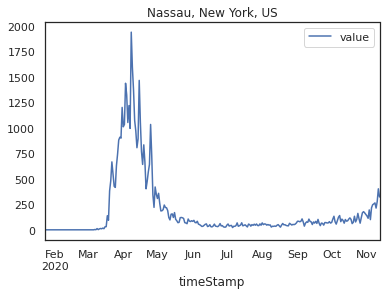

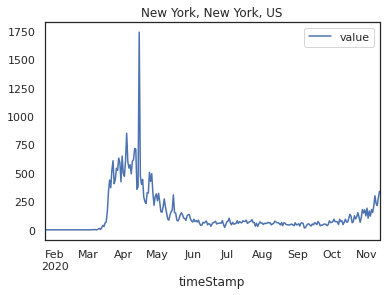

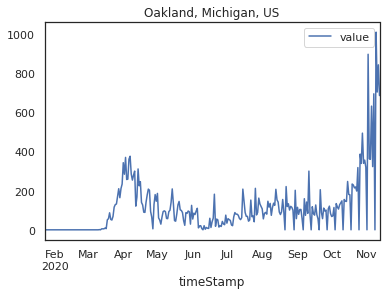

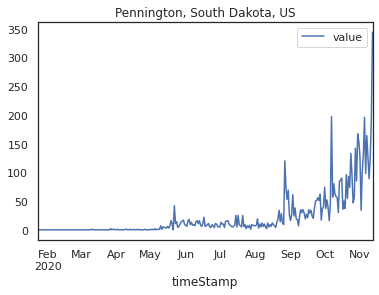

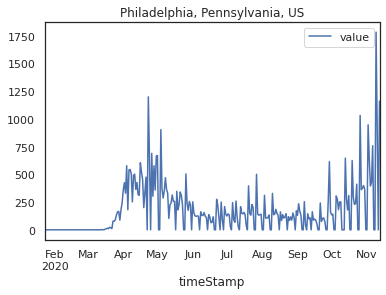

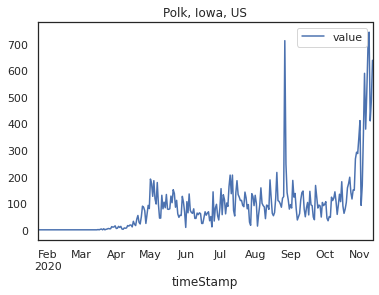

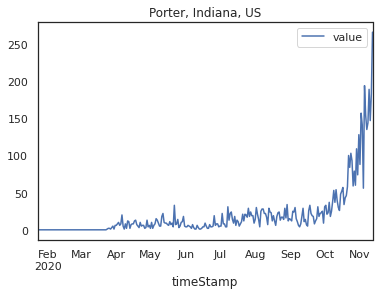

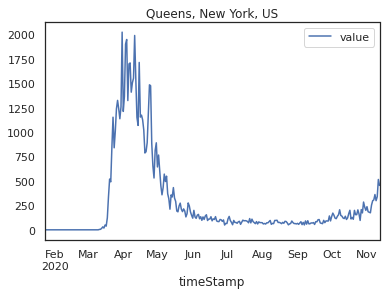

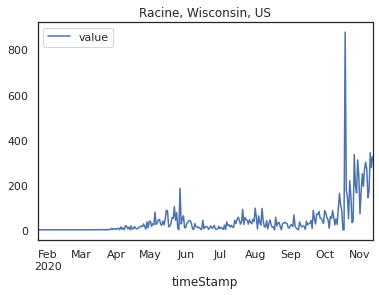

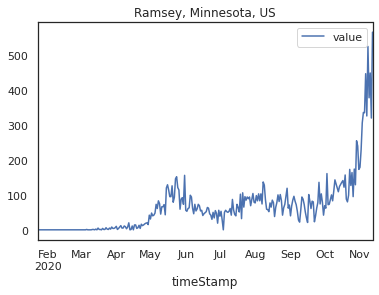

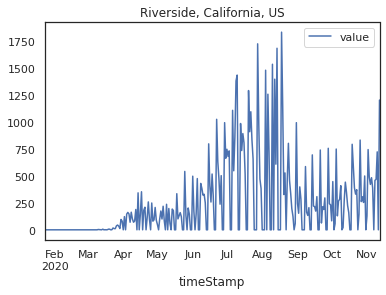

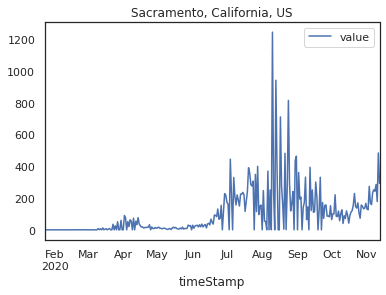

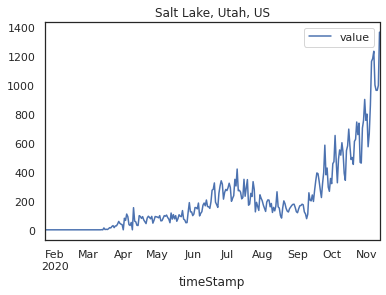

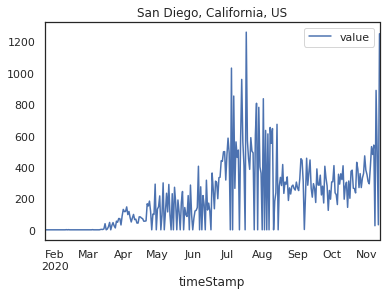

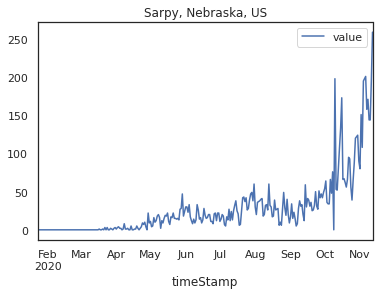

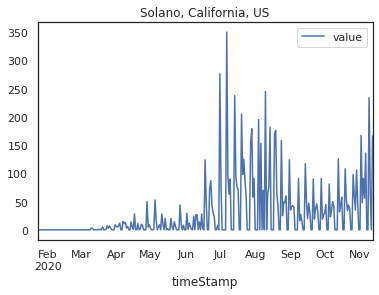

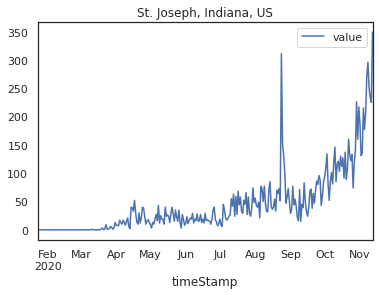

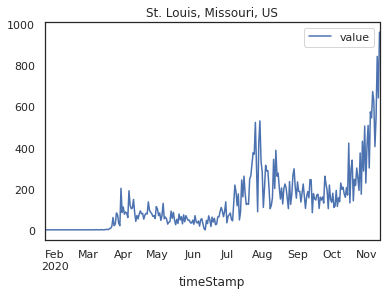

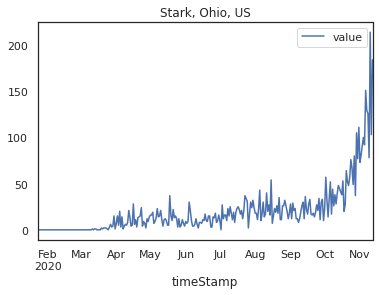

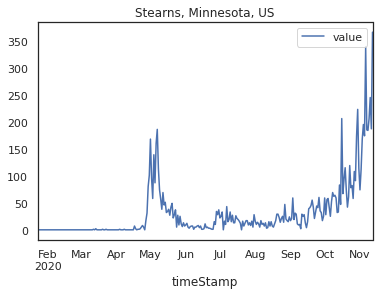

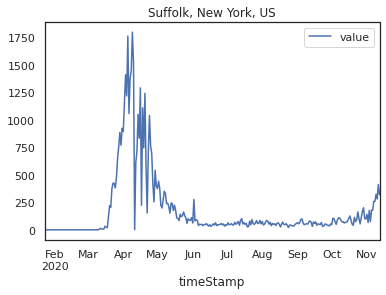

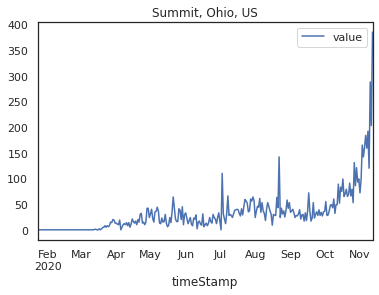

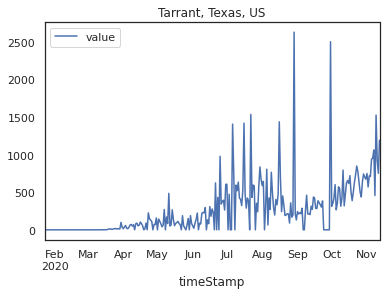

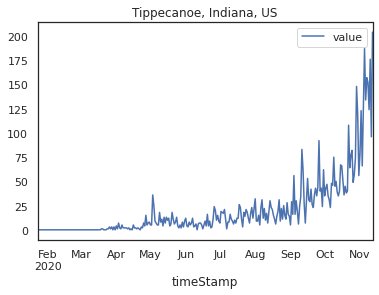

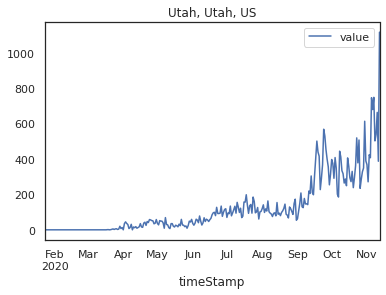

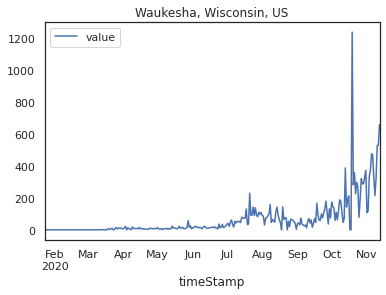

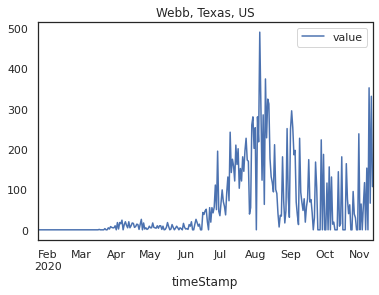

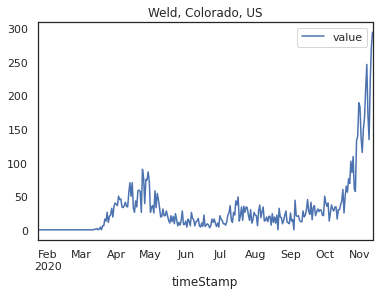

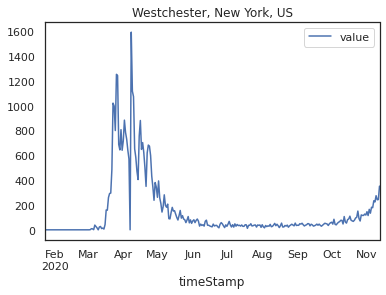

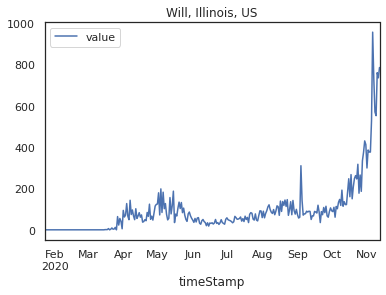

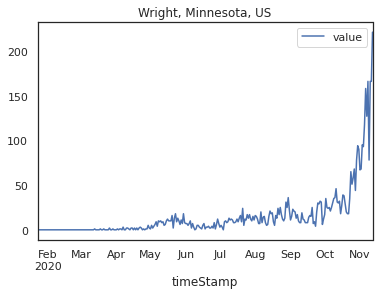

In [28]:

my_list = ts[ts['value']>100]['Country/Region'].tolist()[0:300]
bad_data = m[m['value']<0]['Country/Region'].unique().tolist()

t=m[m['Country/Region'].isin(my_list)]
t = t[~t['Country/Region'].isin(bad_data)]




t=m[m['Country/Region'].isin(my_list)]
t=t[~t['Country/Region'].isin(bad_data)]

for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)